# Servo Prediction using Linear Regression

### **Objective**: make a prediction using linear regression for servo motor control

**what is servo?**


A servo, short for servo motor, is a type of electric motor that is designed to rotate to a specific position and maintain that position with high precision and accuracy. Servo motors are commonly used in robotics, automation, and control systems where precise positioning and motion control are required.


Servo motors consist of a rotor, a stator, and a control circuit. The rotor is the rotating part of the motor and is connected to the output shaft. The stator is the stationary part of the motor and contains the windings that generate the electromagnetic field. The control circuit provides the signals that control the motor's position and speed.

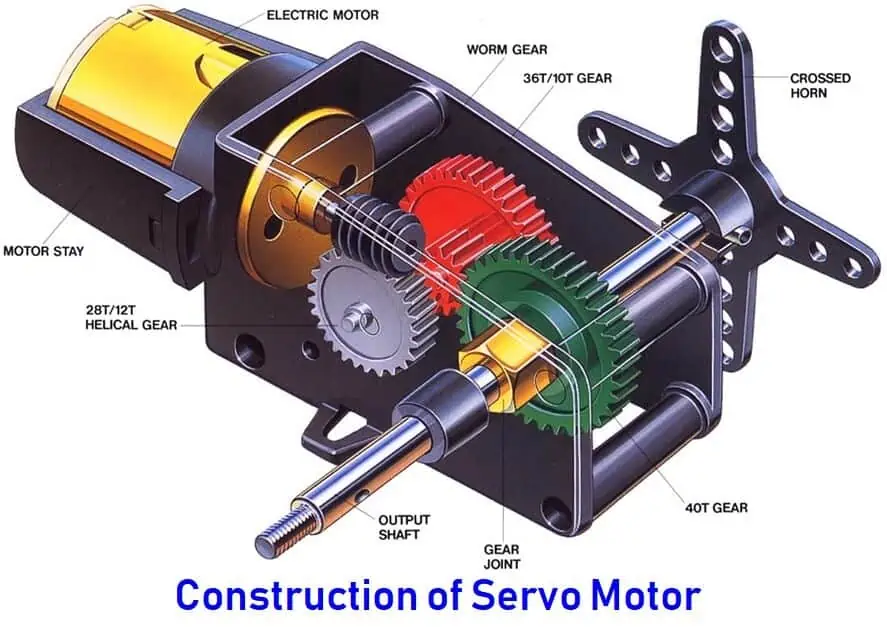

The control circuit of a servo motor receives a signal, typically a pulse width modulation (PWM) signal, from a controller that specifies the desired position of the servo. The control circuit then adjusts the current to the motor windings to rotate the rotor to the desired position. Once the rotor has reached the desired position, the control circuit maintains the current to the motor windings to hold the rotor in place.

Servo motors are widely used in applications such as robotics, CNC machines, aerospace, and medical devices where precise control is essential.

**Data Sourse** : https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv

### step 1: import library

In [206]:
import pandas as pd
import numpy as np

### step 2: import data

In [207]:
# Load the dataset
url = 'https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv'
data = pd.read_csv(url)

## describe the data

A dataframe with 167 observation on 5 variable, 4 nominal and 1 as the trget class.This data set is from a simulation of a servo system involving a servo amplifier, a motor, a lead screw, and sliding carrige of some sort.It may have been on of the translation axis of a robot on the 9th floor of the AI lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. the variables that describe the data set and their values are the following:




1.   Motor A, B, C, D, E
2.   Screw A, B, C, D, E
3.   Pgain 3, 4, 5, 6
4.   Vgain 1, 2, 3, 4, 5
5.   Class 0.13 to 7.10

In [208]:
data.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [210]:
data.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [211]:
data.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [212]:
data[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [213]:
data[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

get encoding of categorical features

In [214]:
data.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [215]:
data.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

### step 3: define y dependent and x features

In [216]:
y = data['Class']

In [217]:
y = data['Class']
y.shape

(167,)

In [218]:
x = data[['Motor','Screw','Pgain','Vgain']]

In [219]:
x.shape

(167, 4)

### step 4: train test and split data

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2529)

### step 5: select model

In [222]:
from sklearn.linear_model import LinearRegression

In [223]:
# Create a linear regression model

model = LinearRegression()

### step 6: train model

In [224]:

# Train the model using the training sets
model.fit(x_train, y_train)

LinearRegression()

### step 7: model prediction

In [225]:
# Make predictions using the testing set
y_pred = model.predict(x_test)

In [226]:
y_pred.shape

(51,)

In [227]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

### step 8: model accuracy

In [228]:
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

In [229]:
mean_squared_error(y_test, y_pred)

66.03589175595563

In [230]:
r2_score(y_test, y_pred)

0.6807245170563927

In [231]:
 mean_absolute_error(y_test, y_pred)

7.190539677251235

In [232]:
# Print the model's performance metrics
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 66.04
Coefficient of determination: 0.68


## get visualization of predicted data

In [233]:
from matplotlib import pyplot as plt  

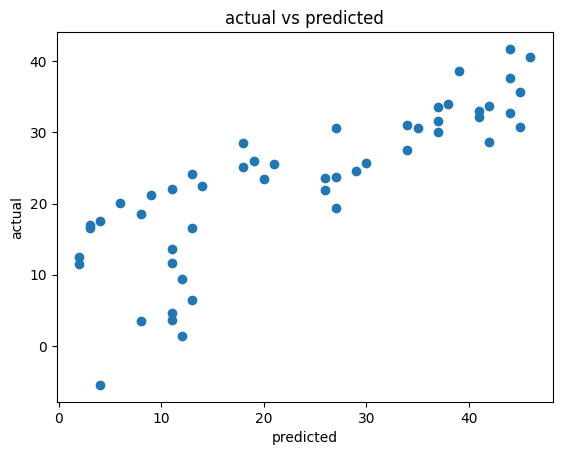

In [234]:
plt.scatter(y_test, y_pred)
plt.title('actual vs predicted')  
plt.ylabel('actual')  
plt.xlabel('predicted')
plt.show()

## get future prediction
### lets select a random sample from existing data set as a new value
step as follows:

1.   extract a random row using sample function
2.   seperate x and y
3.   standardize x
4.   predict





In [235]:
x_new = data.sample(1)

In [236]:
x_new = x_new.drop('Class',axis=1)

In [237]:
x_new

,Motor,Screw,Pgain,Vgain
16,3,2,3,1


In [238]:
x_new.shape

(1, 4)

In [239]:
y_pred_new = model.predict(x_new)

In [240]:
y_pred_new

array([27.99811509])

In [241]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

## explanation:


To create a linear regression model for servo prediction,  we have to
1. Collect data on the input (desired position) and output (actual position) of the servo motor.
2. Plot the data on a scatter plot.
3. Calculate the slope (m) and y-intercept (b) of the line of best fit through the data points using a regression analysis tool.
4. Use the equation y = mx + b to make predictions for new input values.


where y is the output (in this case, the actual position of the servo motor), x is the input (in this case, the desired position of the servo motor), m is the slope of the line, and b is the y-intercept.